In [1]:
# Import libraries
import numpy as np
import pandas as pd
import random as rd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import statistics as st
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Display the entire data set, values shown up to 4 decimal places
pd.set_option("display.max.columns", None)
pd.set_option("display.max.row", None)
pd.set_option("display.precision", 4)

In [3]:
# Load the dataset
data = pd.read_excel('Dataset-Daphniamagna.xlsx')
data

,ID,CAS No.,Chemical Name,Set*,Acute Toxicity Class [Observed],MLOGP,η,Me,Ad,nBT,Hy
0,ID-39,79947,"2,2',6,6'-tetrabromo-4,4'-isopropylidenediphenol",T,Highly toxic,5.2547,4.2730,1.0194,40.3316,34,0.3778
1,ID-44,80513,"4,4'-Oxybis(benzenesulfonylhydrazide)",T,Highly toxic,0.5416,4.3525,1.0436,34.4918,38,3.7945
2,ID-49,84695,Diisobutyl phthalate,T,Highly toxic,3.6180,4.7875,1.0007,30.6613,42,-0.7872
3,ID-50,84742,Dibutyl phthalate,T,Highly toxic,3.6180,4.7445,1.0007,30.8098,42,-0.7872
4,ID-67,88857,"Phenol, 2-(1-methylpropyl)-4,6-dinitro-",T,Highly toxic,2.7021,4.3735,1.0434,23.1032,29,-0.0829
5,ID-98,93834,"N,N-Bis(2-hydroxyethyl)oleamide",T,Highly toxic,4.4314,5.2795,0.9803,43.6258,68,0.1750
6,ID-163,101020,Triphenyl phosphite,T,Highly toxic,4.4532,3.8990,1.0007,37.5793,39,-0.8066
7,ID-165,101202,"1-(4-Chlorophenyl)-3-(3,4-dichlorophenyl)urea",T,Highly toxic,3.9875,4.1965,1.0329,32.2564,29,0.4449
8,ID-247,115322,Kelthane,T,Highly toxic,5.1490,4.5430,1.0390,34.6314,30,-0.2221
9,ID-248,115866,Triphenyl phosphate,T,Highly toxic,4.7894,3.9710,1.0093,38.3931,40,-0.7721


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               495 non-null    object 
 1   CAS No.                          495 non-null    int64  
 2   Chemical Name                    495 non-null    object 
 3   Set*                             495 non-null    object 
 4   Acute Toxicity Class [Observed]  495 non-null    object 
 5   MLOGP                            495 non-null    float64
 6   η                                495 non-null    float64
 7   Me                               495 non-null    float64
 8   Ad                               495 non-null    float64
 9   nBT                              495 non-null    int64  
 10  Hy                               495 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 42.7+ KB


In [5]:
# Conversion from words to numbers - dependent variable
data['Acute Toxicity Class [Observed]'].replace(['Highly toxic', 'Low to non-toxic'], [1, 0], inplace=True)
data 

,ID,CAS No.,Chemical Name,Set*,Acute Toxicity Class [Observed],MLOGP,η,Me,Ad,nBT,Hy
0,ID-39,79947,"2,2',6,6'-tetrabromo-4,4'-isopropylidenediphenol",T,1,5.2547,4.2730,1.0194,40.3316,34,0.3778
1,ID-44,80513,"4,4'-Oxybis(benzenesulfonylhydrazide)",T,1,0.5416,4.3525,1.0436,34.4918,38,3.7945
2,ID-49,84695,Diisobutyl phthalate,T,1,3.6180,4.7875,1.0007,30.6613,42,-0.7872
3,ID-50,84742,Dibutyl phthalate,T,1,3.6180,4.7445,1.0007,30.8098,42,-0.7872
4,ID-67,88857,"Phenol, 2-(1-methylpropyl)-4,6-dinitro-",T,1,2.7021,4.3735,1.0434,23.1032,29,-0.0829
5,ID-98,93834,"N,N-Bis(2-hydroxyethyl)oleamide",T,1,4.4314,5.2795,0.9803,43.6258,68,0.1750
6,ID-163,101020,Triphenyl phosphite,T,1,4.4532,3.8990,1.0007,37.5793,39,-0.8066
7,ID-165,101202,"1-(4-Chlorophenyl)-3-(3,4-dichlorophenyl)urea",T,1,3.9875,4.1965,1.0329,32.2564,29,0.4449
8,ID-247,115322,Kelthane,T,1,5.1490,4.5430,1.0390,34.6314,30,-0.2221
9,ID-248,115866,Triphenyl phosphate,T,1,4.7894,3.9710,1.0093,38.3931,40,-0.7721


In [6]:
# Remove unnecessary columns
data = data.drop(columns=['ID', 'CAS No.', 'Chemical Name'])
data

,Set*,Acute Toxicity Class [Observed],MLOGP,η,Me,Ad,nBT,Hy
0,T,1,5.2547,4.2730,1.0194,40.3316,34,0.3778
1,T,1,0.5416,4.3525,1.0436,34.4918,38,3.7945
2,T,1,3.6180,4.7875,1.0007,30.6613,42,-0.7872
3,T,1,3.6180,4.7445,1.0007,30.8098,42,-0.7872
4,T,1,2.7021,4.3735,1.0434,23.1032,29,-0.0829
5,T,1,4.4314,5.2795,0.9803,43.6258,68,0.1750
6,T,1,4.4532,3.8990,1.0007,37.5793,39,-0.8066
7,T,1,3.9875,4.1965,1.0329,32.2564,29,0.4449
8,T,1,5.1490,4.5430,1.0390,34.6314,30,-0.2221
9,T,1,4.7894,3.9710,1.0093,38.3931,40,-0.7721


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Set*                             495 non-null    object 
 1   Acute Toxicity Class [Observed]  495 non-null    int64  
 2   MLOGP                            495 non-null    float64
 3   η                                495 non-null    float64
 4   Me                               495 non-null    float64
 5   Ad                               495 non-null    float64
 6   nBT                              495 non-null    int64  
 7   Hy                               495 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 31.1+ KB


In [8]:
# Check for empty cells
data.isnull().any()

Set*                               False
Acute Toxicity Class [Observed]    False
MLOGP                              False
η                                  False
Me                                 False
Ad                                 False
nBT                                False
Hy                                 False
dtype: bool

In [9]:
ATC = data['Acute Toxicity Class [Observed]']

In [10]:
# Check the number of classes
ATC.value_counts()

1    314
0    181
Name: Acute Toxicity Class [Observed], dtype: int64

In [11]:
# List column names
print(data.columns)

Index(['Set*', 'Acute Toxicity Class [Observed]', 'MLOGP', 'η', 'Me', 'Ad',
       'nBT', 'Hy'],
      dtype='object')


In [12]:
# Create a training and test set for X and y

In [13]:
data_X = data.drop(columns=['Acute Toxicity Class [Observed]'])

In [14]:
X_train = data_X.loc[data_X['Set*'] == 'T']

In [15]:
X_train = X_train.drop(columns=['Set*'])
X_train # X train set

,MLOGP,η,Me,Ad,nBT,Hy
0,5.2547,4.2730,1.0194,40.3316,34,0.3778
1,0.5416,4.3525,1.0436,34.4918,38,3.7945
2,3.6180,4.7875,1.0007,30.6613,42,-0.7872
3,3.6180,4.7445,1.0007,30.8098,42,-0.7872
4,2.7021,4.3735,1.0434,23.1032,29,-0.0829
5,4.4314,5.2795,0.9803,43.6258,68,0.1750
6,4.4532,3.8990,1.0007,37.5793,39,-0.8066
7,3.9875,4.1965,1.0329,32.2564,29,0.4449
8,5.1490,4.5430,1.0390,34.6314,30,-0.2221
9,4.7894,3.9710,1.0093,38.3931,40,-0.7721


In [16]:
X_test = data_X.loc[data_X['Set*'] == 'V']

In [17]:
X_test = X_test.drop(columns=['Set*'])
X_test # X test set

,MLOGP,η,Me,Ad,nBT,Hy
396,4.3119,4.7390,0.9851,32.8756,43,-0.8856
397,2.9703,3.8330,1.0162,37.8927,40,-0.6273
398,4.9194,3.6865,0.9773,46.6812,52,-0.9089
399,4.3039,4.0015,0.9755,35.2868,45,0.2131
400,2.6953,4.1365,1.0011,34.1240,40,1.7800
401,4.2360,5.4680,0.9963,37.1266,55,-0.7292
402,-0.1724,4.2780,1.0054,7.7066,9,1.7694
403,2.6041,5.2170,0.9993,12.4129,10,-0.5389
404,2.2264,4.3070,0.9654,12.6449,17,0.0045
405,0.0762,5.3955,1.0126,10.3728,14,-0.6684


In [18]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 395
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MLOGP   396 non-null    float64
 1   η       396 non-null    float64
 2   Me      396 non-null    float64
 3   Ad      396 non-null    float64
 4   nBT     396 non-null    int64  
 5   Hy      396 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 21.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 396 to 494
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MLOGP   99 non-null     float64
 1   η       99 non-null     float64
 2   Me      99 non-null     float64
 3   Ad      99 non-null     float64
 4   nBT     99 non-null     int64  
 5   Hy      99 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 5.4 KB


In [19]:
X_train.shape, X_test.shape

((396, 6), (99, 6))

In [20]:
data_y = data.drop(columns=['MLOGP', 'η', 'Me', 'Ad', 'nBT', 'Hy'])

In [21]:
y_train = data_y.loc[data_y['Set*'] == 'T']

In [22]:
y_train = y_train.drop(columns=['Set*'])
y_train # y train set

,Acute Toxicity Class [Observed]
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [23]:
y_test = data_y.loc[data_y['Set*'] == 'V']

In [24]:
y_test = y_test.drop(columns=['Set*'])
y_test # y testing

,Acute Toxicity Class [Observed]
396,1
397,1
398,1
399,1
400,1
401,1
402,1
403,1
404,1
405,1


In [25]:
X_train, X_test, y_train, y_test # Ready train and test set (before standardization)

(      MLOGP       η      Me       Ad  nBT      Hy
 0    5.2547  4.2730  1.0194  40.3316   34  0.3778
 1    0.5416  4.3525  1.0436  34.4918   38  3.7945
 2    3.6180  4.7875  1.0007  30.6613   42 -0.7872
 3    3.6180  4.7445  1.0007  30.8098   42 -0.7872
 4    2.7021  4.3735  1.0434  23.1032   29 -0.0829
 5    4.4314  5.2795  0.9803  43.6258   68  0.1750
 6    4.4532  3.8990  1.0007  37.5793   39 -0.8066
 7    3.9875  4.1965  1.0329  32.2564   29  0.4449
 8    5.1490  4.5430  1.0390  34.6314   30 -0.2221
 9    4.7894  3.9710  1.0093  38.3931   40 -0.7721
 10   6.3605  5.8735  0.9634  38.7970   63 -0.9380
 11   4.7889  4.5610  0.9875  44.4618   53  0.0703
 12   3.6439  4.4590  0.9873  32.2739   42  0.2131
 13   7.2283  5.7390  0.9630  46.1310   75 -0.9484
 14   5.4722  3.8800  1.0001  45.6175   49 -0.7984
 15   3.2306  3.8745  0.9800  36.4553   44 -0.3697
 16   3.8417  4.2385  1.0435  28.3170   25 -0.1982
 17   5.0004  4.7860  0.9888  41.8406   60 -0.8365
 18   2.9936  4.4515  1.0357  2

In [26]:
# Display information about all collections
print('X_train:')
X_train.info()
print('\nX_test:')
X_test.info()
print('\ny_train:')
y_train.info()
print('\ny_test:')
y_test.info()

X_train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 395
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MLOGP   396 non-null    float64
 1   η       396 non-null    float64
 2   Me      396 non-null    float64
 3   Ad      396 non-null    float64
 4   nBT     396 non-null    int64  
 5   Hy      396 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 21.7 KB

X_test:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 396 to 494
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MLOGP   99 non-null     float64
 1   η       99 non-null     float64
 2   Me      99 non-null     float64
 3   Ad      99 non-null     float64
 4   nBT     99 non-null     int64  
 5   Hy      99 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 5.4 KB

y_train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 39

In [27]:
cols = X_train.columns

In [28]:
# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_df = pd.DataFrame(X_train_scaled)
X_test_df = pd.DataFrame(X_test_scaled)

In [30]:
X_all = pd.concat([X_train_df, X_test_df], axis=0, ignore_index=True) # All set X

In [31]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [32]:
y_all = pd.concat([y_train_df, y_test_df], axis=0, ignore_index=True) # All set y

In [33]:
# Application of Machine Learning methods

# SVM

In [34]:
# Classification by Support Vector Machines
svc = SVC() 
svc.fit(X_train_scaled, y_train)
svc.score(X_test_scaled, y_test)
y_pred_svm = svc.predict(X_test_scaled)
y_pred_svm_train = svc.predict(X_train_scaled)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[27  6]
 [ 8 58]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        33
           1       0.91      0.88      0.89        66

    accuracy                           0.86        99
   macro avg       0.84      0.85      0.84        99
weighted avg       0.86      0.86      0.86        99



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


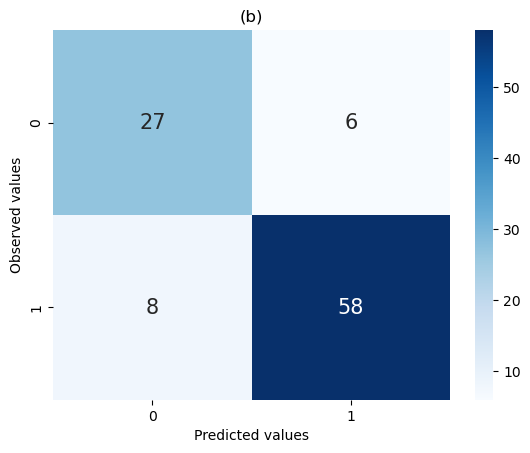

Classification report for SVM:

               precision    recall  f1-score   support

           0       0.77      0.82      0.79        33
           1       0.91      0.88      0.89        66

    accuracy                           0.86        99
   macro avg       0.84      0.85      0.84        99
weighted avg       0.86      0.86      0.86        99



In [35]:
# Confusion matrix for SVM test data
confusion_matrix_test = confusion_matrix(y_test, y_pred_svm)
ax = sns.heatmap(confusion_matrix_test, annot = True, annot_kws={"size":15}, cmap = 'Blues')
ax.set_title('(b)')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Observed values')
plt.show()
print('Classification report for SVM:\n\n', classification_report(y_test,y_pred_svm))

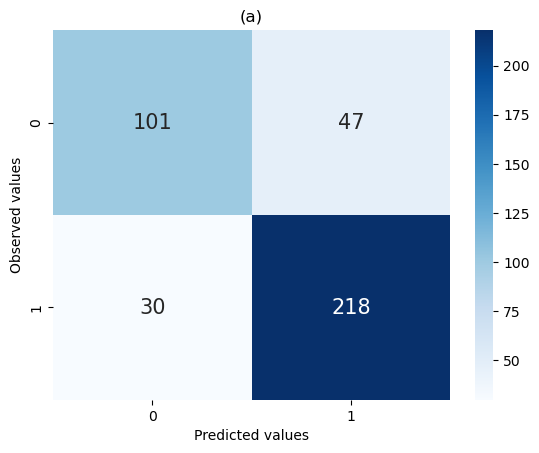

Classification report for SVM:

               precision    recall  f1-score   support

           0       0.77      0.68      0.72       148
           1       0.82      0.88      0.85       248

    accuracy                           0.81       396
   macro avg       0.80      0.78      0.79       396
weighted avg       0.80      0.81      0.80       396



In [36]:
# Confusion matrix for SVM train data
confusion_matrix_train = confusion_matrix(y_train, y_pred_svm_train)
ax = sns.heatmap(confusion_matrix_train, annot=True, fmt='d', annot_kws={"size":15}, cmap='Blues')
ax.set_title('(a)')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Observed values')
plt.show()
print('Classification report for SVM:\n\n', classification_report(y_train,y_pred_svm_train))

In [37]:
matthews_corrcoef(y_test, y_pred_svm) # Calculation of the MCC metric for test data

0.6872564503672763

In [38]:
matthews_corrcoef(y_train, y_pred_svm_train) # Calculation of the MCC metric for train data

0.5773252639288161

# KNN

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

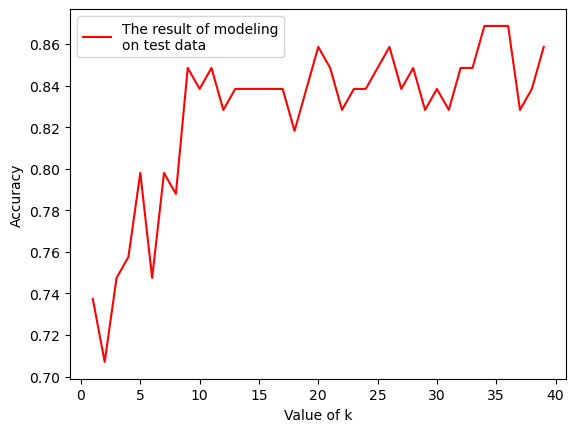

In [39]:
# Create an accuracy plot for find optimal value k
neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracy[i] = knn.score(X_train_scaled, y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)
plt.plot(neighbors, test_accuracy, label = 'The result of modeling\non test data', color = 'red')
#plt.plot(neighbors, train_accuracy, label = 'The result of modeling\non train data', color = 'blue')
plt.legend()
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.show()

In [40]:
optimal_k = neighbors[np.argmax(test_accuracy)]
print(optimal_k) # Print optimal value k

34


In [41]:
# Classification by k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=34, metric='euclidean')
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn_train = knn.predict(X_train_scaled)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[28  5]
 [ 8 58]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.92      0.88      0.90        66

    accuracy                           0.87        99
   macro avg       0.85      0.86      0.86        99
weighted avg       0.87      0.87      0.87        99



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typical

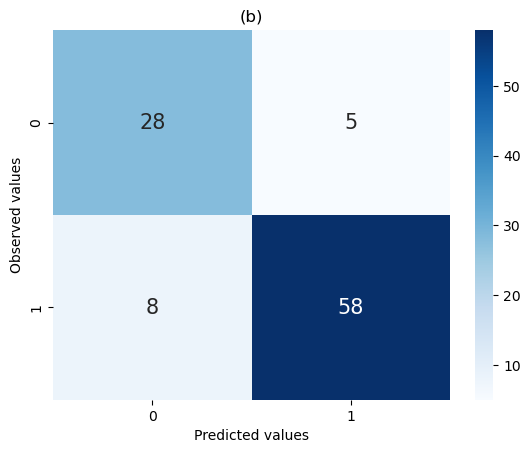

Classification report for KNN:

               precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.92      0.88      0.90        66

    accuracy                           0.87        99
   macro avg       0.85      0.86      0.86        99
weighted avg       0.87      0.87      0.87        99



In [42]:
# Confusion matrix for kNN test data
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test, y_pred_knn)
cm_test  = sns.heatmap(confusion_matrix_test, annot=True, annot_kws={"size":15}, cmap='Blues')
cm_test.set_title('(b)')
cm_test.set_xlabel('Predicted values')
cm_test.set_ylabel('Observed values')
plt.show()
print('Classification report for KNN:\n\n', classification_report(y_test,y_pred_knn))

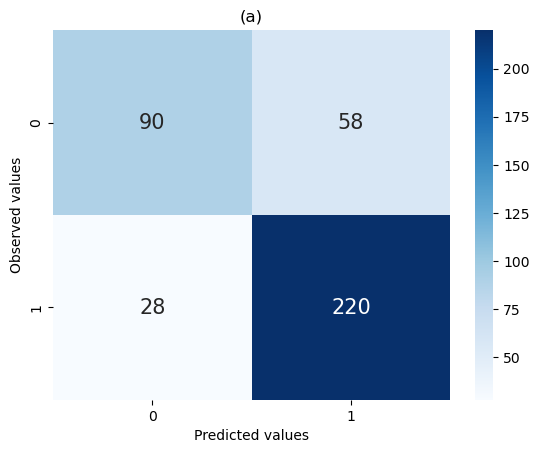

Classification report for KNN:

               precision    recall  f1-score   support

           0       0.76      0.61      0.68       148
           1       0.79      0.89      0.84       248

    accuracy                           0.78       396
   macro avg       0.78      0.75      0.76       396
weighted avg       0.78      0.78      0.78       396



In [43]:
# Confusion matrix for kNN train data
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_knn_train)
cm_train = sns.heatmap(confusion_matrix_train, annot = True, fmt='d', annot_kws={"size":15}, cmap = 'Blues')
cm_train.set_title('(a)')
cm_train.set_xlabel('Predicted values')
cm_train.set_ylabel('Observed values')
plt.show()
print('Classification report for KNN:\n\n', classification_report(y_train,y_pred_knn_train))

In [44]:
matthews_corrcoef(y_test, y_pred_knn)

0.7126966450997984

In [45]:
matthews_corrcoef(y_train, y_pred_knn_train)

0.5238153420054333

# XGBoost

In [46]:
# Start the GridSearchCV method
grid_params = {'n_estimators': range(2,10), 'max_depth': range(2,10)}

In [47]:
xgb = XGBClassifier()
gs = GridSearchCV(estimator=xgb, param_grid=grid_params, cv=3)

In [48]:
h = gs.fit(X_train_scaled, y_train)

In [49]:
best_parameters = h.best_params_
print(best_parameters)

{'max_depth': 2, 'n_estimators': 9}


In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
# Classification by XGBoost
xgboost = XGBClassifier(n_estimators=9, max_depth=2)
xgboost.fit(X_train_scaled, y_train)
y_pred_xgboost = xgboost.predict(X_test_scaled)
y_pred_xgboost_train = xgboost.predict(X_train_scaled)
print(confusion_matrix(y_test, y_pred_xgboost))
print(classification_report(y_test, y_pred_xgboost))

[[24  9]
 [ 6 60]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        33
           1       0.87      0.91      0.89        66

    accuracy                           0.85        99
   macro avg       0.83      0.82      0.83        99
weighted avg       0.85      0.85      0.85        99



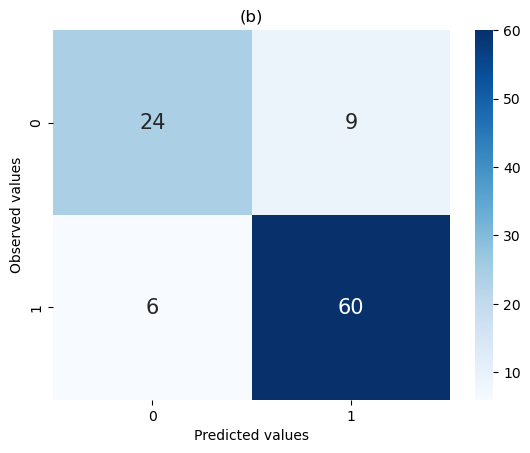

Classification report for XGBoost:

               precision    recall  f1-score   support

           0       0.80      0.73      0.76        33
           1       0.87      0.91      0.89        66

    accuracy                           0.85        99
   macro avg       0.83      0.82      0.83        99
weighted avg       0.85      0.85      0.85        99



In [52]:
# Confusion matrix for XGB test data
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgboost)
ax = sns.heatmap(confusion_matrix_xgb, annot = True, annot_kws={"size":15}, cmap = 'Blues')
ax.set_title('(b)')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Observed values')
plt.show()
print('Classification report for XGBoost:\n\n', classification_report(y_test, y_pred_xgboost))

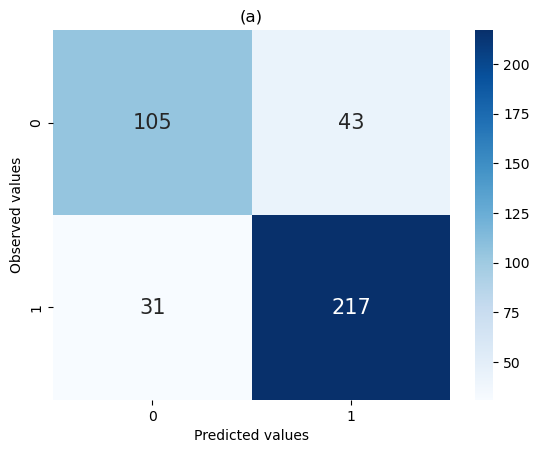

Classification report for XGBoost:

               precision    recall  f1-score   support

           0       0.77      0.71      0.74       148
           1       0.83      0.88      0.85       248

    accuracy                           0.81       396
   macro avg       0.80      0.79      0.80       396
weighted avg       0.81      0.81      0.81       396



In [53]:
# Confusion matrix for XGB train data
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_xgboost_train)
ax = sns.heatmap(confusion_matrix_train, annot = True, fmt='d', annot_kws={"size":15}, cmap = 'Blues')
ax.set_title('(a)')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Observed values')
plt.show()
print('Classification report for XGBoost:\n\n', classification_report(y_train,y_pred_xgboost_train))

In [54]:
matthews_corrcoef(y_test, y_pred_xgboost)

0.6527533657682196

In [55]:
matthews_corrcoef(y_train, y_pred_xgboost_train)

0.5954632480349256

# Naive Bayes

In [56]:
# Classification by Gaussian Naive Bayes
naivebayes = GaussianNB()
naivebayes.fit(X_train_scaled, y_train)
#naivebayes.score(X_test_scaled, y_test)
y_pred_nb = naivebayes.predict(X_test_scaled)
y_pred_naivebayes_train = naivebayes.predict(X_train_scaled)
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[22 11]
 [10 56]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        33
           1       0.84      0.85      0.84        66

    accuracy                           0.79        99
   macro avg       0.76      0.76      0.76        99
weighted avg       0.79      0.79      0.79        99



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


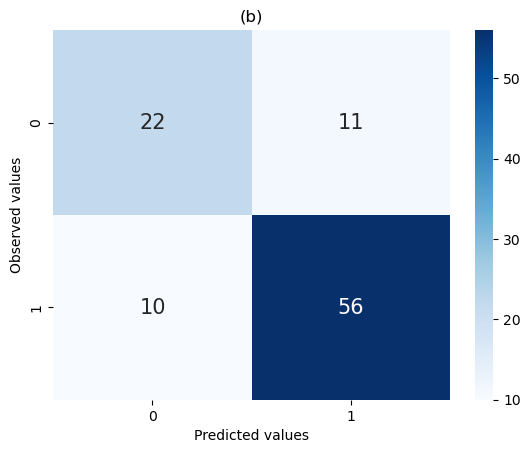

Classification report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.69      0.67      0.68        33
           1       0.84      0.85      0.84        66

    accuracy                           0.79        99
   macro avg       0.76      0.76      0.76        99
weighted avg       0.79      0.79      0.79        99



In [57]:
# Confusion matrix for NB test data
confusion_matrix_nbayes = confusion_matrix(y_test, y_pred_nb)
ax = sns.heatmap(confusion_matrix_nbayes, annot = True, annot_kws={"size":15}, cmap = 'Blues')
ax.set_title('(b)')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Observed values')
plt.show()
print('Classification report for Naive Bayes:\n\n',classification_report(y_test, y_pred_nb))

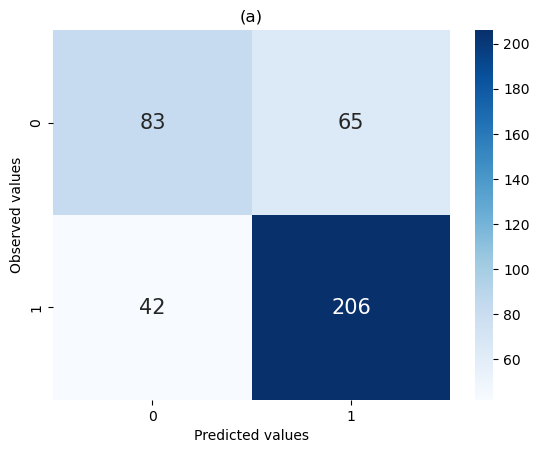

Classification report for NB:

               precision    recall  f1-score   support

           0       0.66      0.56      0.61       148
           1       0.76      0.83      0.79       248

    accuracy                           0.73       396
   macro avg       0.71      0.70      0.70       396
weighted avg       0.72      0.73      0.72       396



In [58]:
# Confusion matrix for NB train data
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_naivebayes_train)
ax = sns.heatmap(confusion_matrix_train, annot = True, fmt='d', annot_kws={"size":15}, cmap = 'Blues')
ax.set_title('(a)')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Observed values')
plt.show()
print('Classification report for NB:\n\n', classification_report(y_train,y_pred_naivebayes_train))

In [59]:
matthews_corrcoef(y_test, y_pred_nb)

0.5192201385142972

In [60]:
matthews_corrcoef(y_train, y_pred_naivebayes_train)

0.40747406254896457

# MLP

In [61]:
# Classification by Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=30, activation='relu', solver='adam', random_state=1)
mlp.fit(X_train_scaled, y_train)
#mlp.score(X_test_scaled, y_test)
y_pred_mlp = mlp.predict(X_test_scaled)
y_pred_mlp_train = mlp.predict(X_train_scaled)
print(confusion_matrix(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[[27  6]
 [ 9 57]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.90      0.86      0.88        66

    accuracy                           0.85        99
   macro avg       0.83      0.84      0.83        99
weighted avg       0.85      0.85      0.85        99



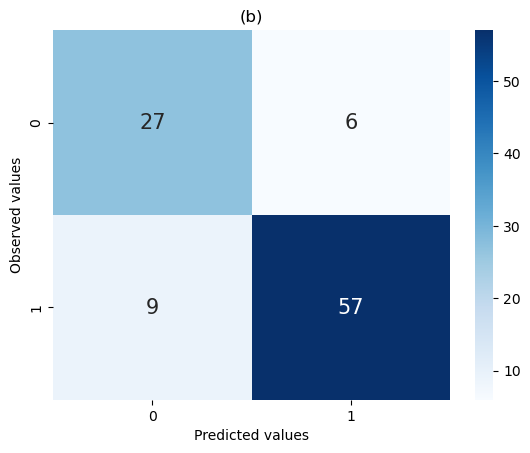

Classification report for MLP:

               precision    recall  f1-score   support

           0       0.75      0.82      0.78        33
           1       0.90      0.86      0.88        66

    accuracy                           0.85        99
   macro avg       0.83      0.84      0.83        99
weighted avg       0.85      0.85      0.85        99



In [62]:
# Confusion matrix for MLP test data
confusion_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
ax = sns.heatmap(confusion_matrix_mlp, annot = True, annot_kws={"size":15}, cmap = 'Blues')
ax.set_title('(b)')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Observed values')
plt.show()
print('Classification report for MLP:\n\n',classification_report(y_test, y_pred_mlp))

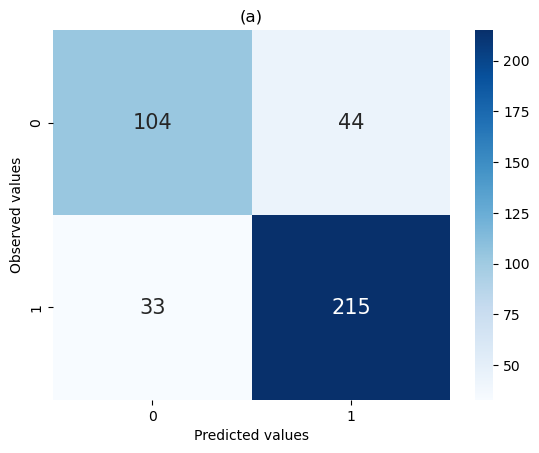

Classification report for MLP:

               precision    recall  f1-score   support

           0       0.76      0.70      0.73       148
           1       0.83      0.87      0.85       248

    accuracy                           0.81       396
   macro avg       0.79      0.78      0.79       396
weighted avg       0.80      0.81      0.80       396



In [63]:
# Confusion matrix for MLP train data
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_mlp_train)
ax = sns.heatmap(confusion_matrix_train, annot = True, fmt='d', annot_kws={"size":15}, cmap = 'Blues')
ax.set_title('(a)')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Observed values')
plt.show()
print('Classification report for MLP:\n\n', classification_report(y_train,y_pred_mlp_train))

In [64]:
matthews_corrcoef(y_test, y_pred_mlp)

0.6681531047810609

In [65]:
matthews_corrcoef(y_train, y_pred_mlp_train)

0.579356158316691